In [1]:
'''This Notebook generates Figure 3a-c for the MIST manuscript'''
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
data_names = ['Human_Breast_Cancer_BAS1', 'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE',
              'Human_Breast_Cancer_BAS2', 'Human_Breast_Cancer_Ductal_Carcinoma_FFPE','Human_Glioblastoma', 
              'Melanoma', 'MouseAD', 'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 
              'MouseWT', 'Human_Colorectal_Cancer','Human_Prostate_Cancer_Adenocarcinoma_FFPE','Prostate']

data_shorts = dict(zip(data_names, ['HBCB1', 'HPCACCF',
                                    'HBCB2', 'HBCDC', 'HG',
                                    'Melanoma', 'MouseAD', 'HIDC', 'HOC',
                                    'MouseWT', 'HCC', 'HPCA', 'Prostate']))

data_order = ['Human_Breast_Cancer_BAS1', 'Human_Breast_Cancer_BAS2',  'Human_Breast_Cancer_Ductal_Carcinoma_FFPE',             
              'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE', 'Human_Prostate_Cancer_Adenocarcinoma_FFPE',
              'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 'Human_Glioblastoma', 'Human_Colorectal_Cancer', 
              'Melanoma', 'MouseAD', 'MouseWT', 'Prostate']

data_order = [data_shorts[dn] for dn in data_order]

run_in_houston = ['Human_Breast_Cancer_BAS1','Human_Breast_Cancer_BAS2','Human_Ovarian_Cancer', 'Melanoma', 'Prostate']



In [4]:
slide_perfs = []
for dn in data_names:
    if dn in run_in_houston:
        dataDir = '../data'
    else:
        dataDir = '../data_other_servers'
    fn = f"{dataDir}/{dn}/performance/slide_level_results.csv"
    df = pd.read_csv(fn)
    df["data"] = data_shorts[dn]
    df["data_full_name"] = dn
    slide_perfs.append(df)
slide_perfs = pd.concat(slide_perfs)

In [25]:
from scipy.stats import ttest_rel

### MIST's performance as compared to others
## Printed values are: model to be compared, percenta
r1 = slide_perfs.loc[slide_perfs.ModelName=='MIST', 'PCC'].to_numpy()
rmse1 = slide_perfs.loc[slide_perfs.ModelName=='MIST', 'RMSE'].to_numpy()

for model in ['MAGIC', 'knnSmooth', 'mcImpute', 'spKNN']:
#     for data in ['MouseWT', 'MouseAD', 'Melanoma'']
    r2 = slide_perfs.loc[slide_perfs.ModelName==model, 'PCC'].to_numpy()
    pr = ttest_rel(r1, r2)[1]
    rmse2 = slide_perfs.loc[slide_perfs.ModelName==model, 'RMSE'].to_numpy()
    prmse = ttest_rel(rmse1, rmse2)[1]
    r1_mean, r2_mean, rmse1_mean, rmse2_mean = np.mean(r1), np.mean(r2), np.mean(rmse1), np.mean(rmse2)
    print(f"MIST vs {model}, \n\t{(100 * (r1_mean-r2_mean)/r2_mean):.2f}% increased PCC (P={pr}),\
 \n\t{(100 * (rmse2_mean-rmse1_mean)/rmse2_mean):.2f}% decreased RMSE (P = {prmse}) ")

MIST vs MAGIC, 
	7.69% increased PCC (P=1.941081083300695e-30), 
	25.74% decreased RMSE (P = 8.525151080121443e-55) 
MIST vs knnSmooth, 
	122.07% increased PCC (P=4.027152542661363e-74), 
	69.46% decreased RMSE (P = 7.371835520130999e-66) 
MIST vs mcImpute, 
	7.89% increased PCC (P=2.545213282438767e-30), 
	12.96% decreased RMSE (P = 8.24105728648308e-26) 
MIST vs spKNN, 
	54.95% increased PCC (P=1.052179127708036e-37), 
	61.45% decreased RMSE (P = 1.1255735472153382e-37) 


## SLIDE LEVEL PERFORMANCE

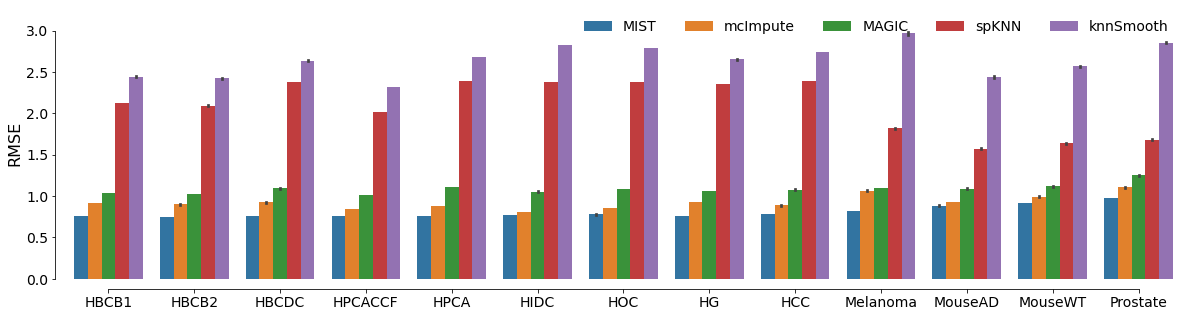

In [9]:
f1 = plt.figure(figsize=(20, 5))
sns.barplot(data=slide_perfs, x='data', y='RMSE', hue='ModelName', order=data_order)
plt.xlabel("")
plt.legend(loc=1, ncol=len(set(slide_perfs.ModelName)), fontsize=14, frameon=False)
plt.margins(y=0.1)
sns.despine(offset=10, trim=True);
plt.tick_params(axis='both', labelsize=14)
plt.ylabel("RMSE", fontsize=16)
plt.savefig("../figures/holout_RMSE.png", dpi=200, bbox_inches='tight')

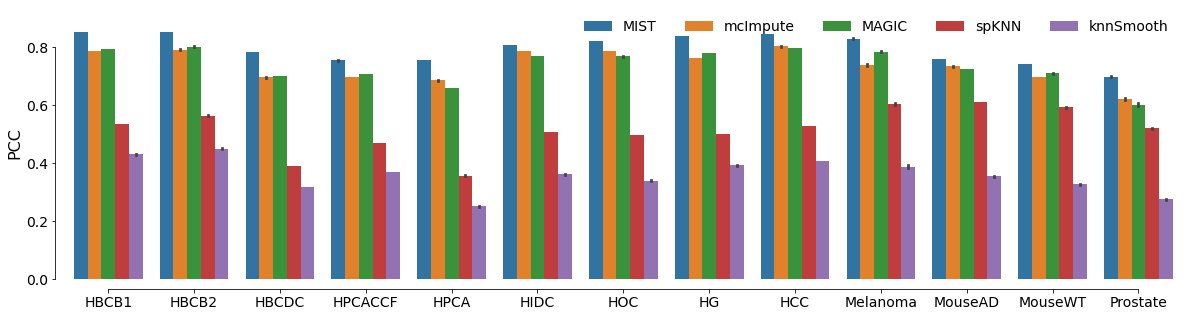

In [10]:
f2 = plt.figure(figsize=(20, 5))
sns.barplot(data=slide_perfs, x='data', y='PCC', hue='ModelName', order=data_order)
plt.xlabel("")
plt.legend(loc=1, ncol=len(set(slide_perfs.ModelName)), fontsize=14, frameon=False)
plt.margins(y=0.1)
plt.tick_params(axis='both', labelsize=14)
plt.ylabel("PCC", fontsize=16)
sns.despine(offset=10, trim=True);
plt.savefig("../figures/holout_PCC.png", dpi=200, bbox_inches='tight')

## GENE LEVEL Performance

In [11]:
gene_perfs = []

for dn in data_names:
    if dn in run_in_houston:
        dataDir = '../data'
    else:
        dataDir = '../data_other_servers'
    fn = f"{dataDir}/{dn}/performance/gene_level_results.csv"
    df = pd.read_csv(fn)
    df["data"] = data_shorts[dn]
    df["data_full_name"] = dn
    gene_perfs.append(df)
gene_perfs = pd.concat(gene_perfs)
gene_perfs['Sparsity (Zero %)'] = (gene_perfs['mr'].round(1) * 100).astype(int)

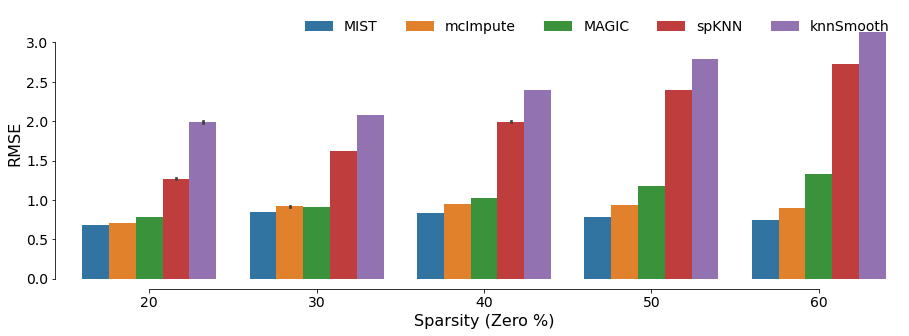

In [12]:
f3 = plt.figure(figsize=(15, 5))
sns.barplot(data=gene_perfs, x='Sparsity (Zero %)', y='rmse', hue='model')
plt.legend(loc=1)
plt.tick_params(labelsize=14, axis='both')
plt.ylabel("RMSE", fontsize=16)
plt.xlabel('Sparsity (Zero %)', fontsize=16)
plt.legend(ncol=len(set(slide_perfs.ModelName)), loc=1, fontsize=14, frameon=False)
plt.margins(y=0.1)
sns.despine(offset=10, trim=True);
plt.savefig("../figures/holout_gene_sparsity_RMSE.png", dpi=200, bbox_inches='tight')

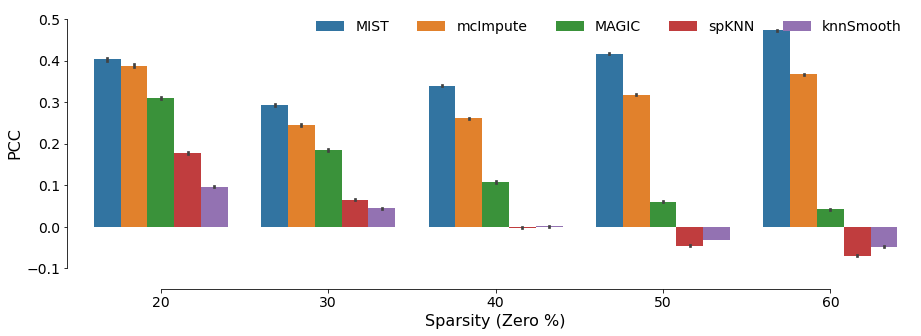

In [13]:
f3 = plt.figure(figsize=(15, 5))
sns.barplot(data=gene_perfs, x='Sparsity (Zero %)', y='pcc', hue='model')
plt.legend(loc=1)
plt.tick_params(labelsize=14, axis='both')
plt.ylabel("PCC", fontsize=16)
plt.xlabel('Sparsity (Zero %)', fontsize=16)
plt.legend(ncol=len(set(slide_perfs.ModelName)), loc=1, fontsize=14, frameon=False)
plt.margins(y=0.1)
sns.despine(offset=10, trim=True);
plt.savefig("../figures/holout_gene_sparsity_pcc.png", dpi=200, bbox_inches='tight')